<a href="https://colab.research.google.com/github/SanjayS2348553/TRIMESTER-2/blob/main/2348553_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv('/content/Program_2_Dataset.csv')

In [4]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [5]:
df

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
502,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98,11.8
503,6.28807,0.0,18.10,0,0.740,6.341,96.4,2.0720,24,666,20.2,318.01,17.79,14.9
504,9.92485,0.0,18.10,0,0.740,6.251,96.6,2.1980,24,666,20.2,388.52,16.44,12.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [8]:
df.corr()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
Crime_Rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
Zone_proportion,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
Non_Retail_Acres,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
Avg_rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
Distance,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
Property_TaxRate,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

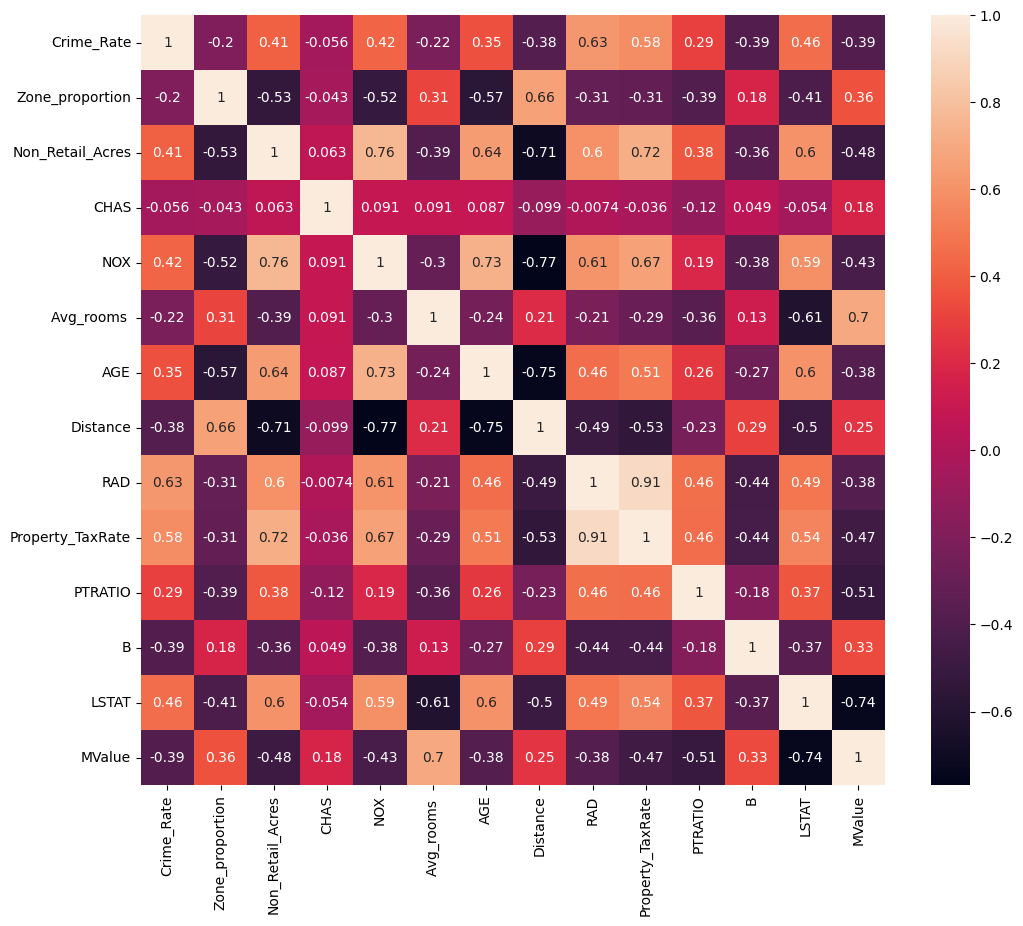

In [9]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot =True)

In [10]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [11]:
features=['Avg_rooms ','Distance','Property_TaxRate','Non_Retail_Acres']
x=df[features]

In [12]:
y=df[['MValue']]

In [13]:
print(x.isnull().sum())

Avg_rooms           0
Distance            0
Property_TaxRate    0
Non_Retail_Acres    0
dtype: int64


In [14]:
print(y.isnull().sum())

MValue    0
dtype: int64


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['columns']=x.columns
vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,columns,VIF
0,Avg_rooms,16.747965
1,Distance,6.880607
2,Property_TaxRate,13.861510
3,Non_Retail_Acres,9.598374


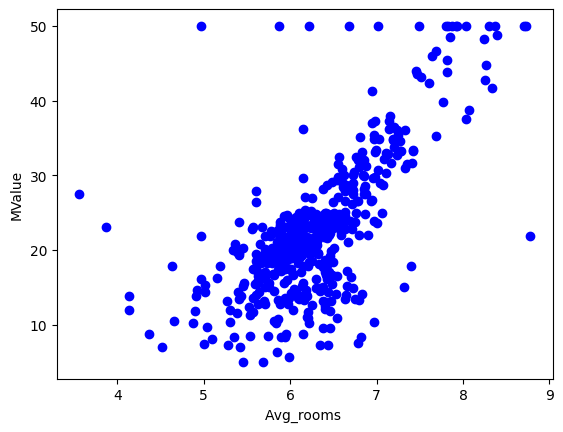

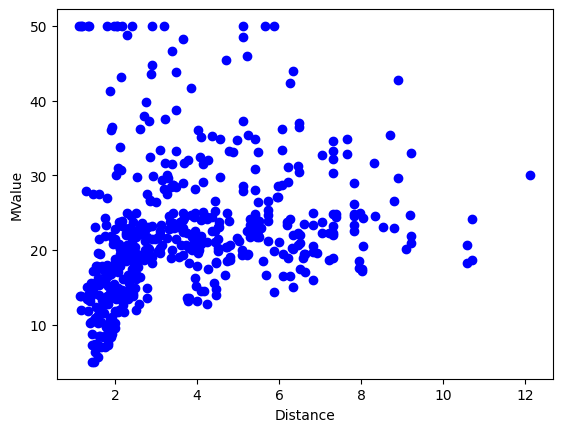

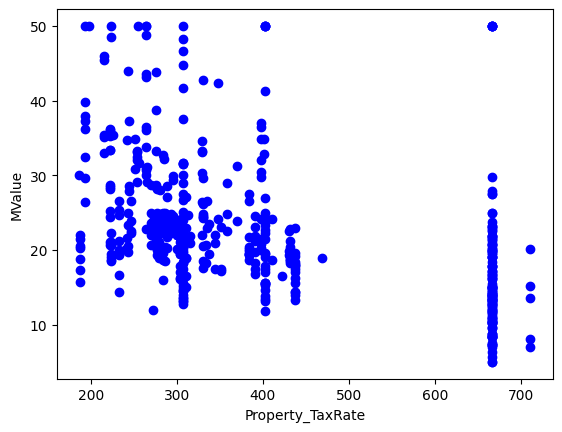

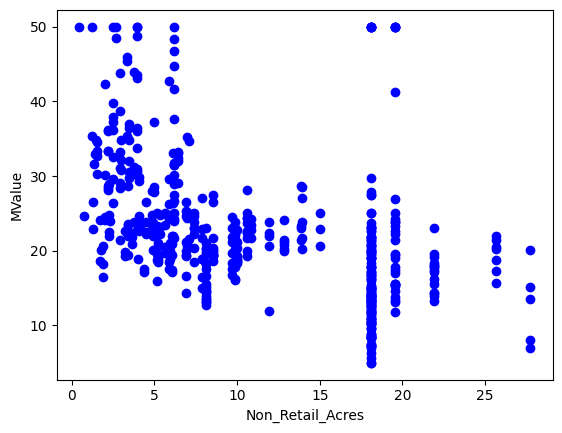

In [16]:
import matplotlib.pyplot as plt
color=['red','blue','grey','purple']
for i in x.columns:
    plt.scatter(x[i],y,color='blue')
    plt.xlabel(i)
    plt.ylabel('MValue')
    plt.show()

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=5)

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [19]:
ypred=model.predict(xtest)

In [20]:
print("Coeffecient ",model.coef_)
print("Intercept ",model.intercept_)

Coeffecient  [[ 7.69914206 -0.5271169  -0.01241498 -0.25137369]]
Intercept  [-15.94600346]


R squared value : r-squared shows how well the data fit the regression model (the goodness of fit).

Formula : 1-RSS/TSS where, RSS - Sum of squares of residuals and TSS - Total sum of squared

Adjusted r squared value : Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model

Adjusted R squared is calculated by dividing the residual mean square error by the total mean square error (which is the sample variance of the target field). The result is then subtracted from 1.

Mean squared error : The Mean Squared Error measures how close a regression line is to a set of data points

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
ypred = model.predict(xtrain)
adjr1 = 1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)
mse_train = mean_squared_error(ytrain, ypred)
r2_train = r2_score(ytrain, ypred)
ypred = model.predict(xtest)
adjr2 = adjr1 = 1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)
mse_test = mean_squared_error(ytest, ypred)
r2_test = r2_score(ytest, ypred)
print("MSE for training data:", mse_train)
print("R2 score for training data:",r2_train)
print("Adjusted R squared value for training data:",adjr1)
print("\nMSE for testing data:", mse_test)
print("R2 score for testing data:",r2_test)
print("Adjusted R squared value for testing data:",adjr2)

MSE for training data: 37.614572410632604
R2 score for training data: 0.5830883105367076
Adjusted R squared value for training data: 0.5658477588365168

MSE for testing data: 33.81521723918313
R2 score for testing data: 0.529886295484896
Adjusted R squared value for testing data: 0.5658477588365168
